Robert Corbett
rwc27@pitt.edu
todo 8

In [1]:
import tweepy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
consumerKey = 'XXXXXXXXXXXXXXXXXXXXXXXXX'
consumerSecret = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'
auth = tweepy.OAuthHandler(consumer_key=consumerKey, consumer_secret=consumerSecret)
api = tweepy.API(auth)

In [3]:
results = []
for tweet in tweepy.Cursor(api.search, q='%23Penguins').items(100):
    results.append(tweet)

In [4]:
print(len(results))

100


In [5]:

def toDataFrame(tweets):

    DataSet = pd.DataFrame()

    DataSet['tweetID'] = [tweet.id for tweet in tweets]
    DataSet['tweetText'] = [tweet.text for tweet in tweets]
    DataSet['tweetRetweetCt'] = [tweet.retweet_count for tweet 
    in tweets]
    DataSet['tweetFavoriteCt'] = [tweet.favorite_count for tweet 
    in tweets]
    DataSet['tweetSource'] = [tweet.source for tweet in tweets]
    DataSet['tweetCreated'] = [tweet.created_at for tweet in tweets]


    DataSet['userID'] = [tweet.user.id for tweet in tweets]
    DataSet['userScreen'] = [tweet.user.screen_name for tweet 
    in tweets]
    DataSet['userName'] = [tweet.user.name for tweet in tweets]
    DataSet['userCreateDt'] = [tweet.user.created_at for tweet 
    in tweets]
    DataSet['userDesc'] = [tweet.user.description for tweet in tweets]
    DataSet['userFollowerCt'] = [tweet.user.followers_count for tweet 
    in tweets]
    DataSet['userFriendsCt'] = [tweet.user.friends_count for tweet 
    in tweets]
    DataSet['userLocation'] = [tweet.user.location for tweet in tweets]
    DataSet['userTimezone'] = [tweet.user.time_zone for tweet 
    in tweets]

    return DataSet

#Pass the tweets list to the above function to create a DataFrame
DataSet = toDataFrame(results)

In [6]:
DataSet.head(5)

,tweetID,tweetText,tweetRetweetCt,tweetFavoriteCt,tweetSource,tweetCreated,userID,userScreen,userName,userCreateDt,userDesc,userFollowerCt,userFriendsCt,userLocation,userTimezone
0,915973308025368576,RT @suntimes_sports: OPENING NIGHT! #Blackhawk...,5,0,Twitter for iPhone,2017-10-05 16:13:49,34629750,PlayDagger4Me,Tanya,2009-04-23 14:45:34,I celebrate #ToewsDay every week- Jonathan Toe...,2953,1932,"AR but in my heart, CHICAGO",Central Time (US & Canada)
1,915972666695213057,"Phil Kessel says #Penguins ""will be right ther...",0,0,Twitter Web Client,2017-10-05 16:11:16,39133099,CodyJBenjamin,Cody Benjamin,2009-05-10 23:19:08,@CBSSports writer. @BleedingGreen columnist. A...,1412,280,,Eastern Time (US & Canada)
2,915970659318198272,RT @BlkHwkNationCHI: It's #Blackhawks Game Day...,7,0,Twitter for iPhone,2017-10-05 16:03:17,22179710,dsolin,Don Solin,2009-02-27 19:39:08,Follower of J.C. Chicago home boy! Check out m...,1429,1633,"Dayton, OH",Eastern Time (US & Canada)
3,915969727633268736,RT @suntimes_sports: OPENING NIGHT! #Blackhawk...,5,0,Twitter for iPhone,2017-10-05 15:59:35,14357283,ChrisDeLuca,Chris De Luca,2008-04-11 01:46:41,"Deputy Managing Editor, News and Sports, Chica...",8657,774,Chicago,Central Time (US & Canada)
4,915968716403351552,@miakhalifa #Penguins going for three in a row...,0,0,Twitter for iPhone,2017-10-05 15:55:34,2945093643,ironcitybrave,Crockett,2014-12-28 01:54:36,"Into Physical fitness ,Sports, & Politics!",694,643,"Ft Myers, Florida",None


In [7]:
DataSet.tweetText[0]

'RT @suntimes_sports: OPENING NIGHT! #Blackhawks and #Penguins battling on the ice, in the history books #NHLopeningnight \n\nhttps://t.co/1Qb…'

In [8]:
DataSet = DataSet[DataSet.userTimezone.notnull()]
len(DataSet)

77

In [9]:
tzs = DataSet['userTimezone'].value_counts()[:10]
print(tzs)

Central Time (US & Canada)     32
Eastern Time (US & Canada)     22
Pacific Time (US & Canada)      7
Tokyo                           2
Buenos Aires                    2
Madrid                          1
Quito                           1
Fiji                            1
Mountain Time (US & Canada)     1
Bern                            1
Name: userTimezone, dtype: int64


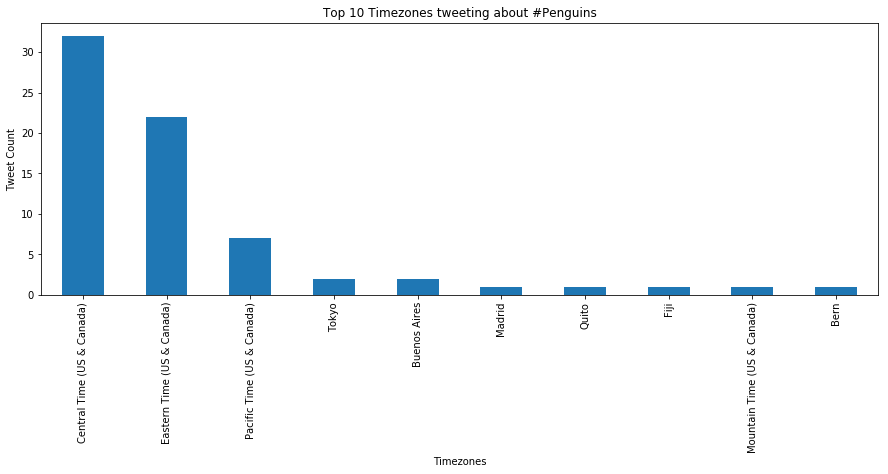

In [10]:
plt.rcParams['figure.figsize'] = (15, 5)

tzs.plot(kind='bar')


plt.xlabel('Timezones')
plt.ylabel('Tweet Count')
plt.title('Top 10 Timezones tweeting about #Penguins')
plt.show()

In [11]:
max_followers = DataSet['userFollowerCt'].max()
print(max_followers)

629728


In [12]:
temp_list = DataSet.loc[DataSet['userFollowerCt'] == max_followers]
print(temp_list['tweetText'])

13    Happy 52nd Birthday to @NHL greats Mario Lemie...
Name: tweetText, dtype: object
